In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

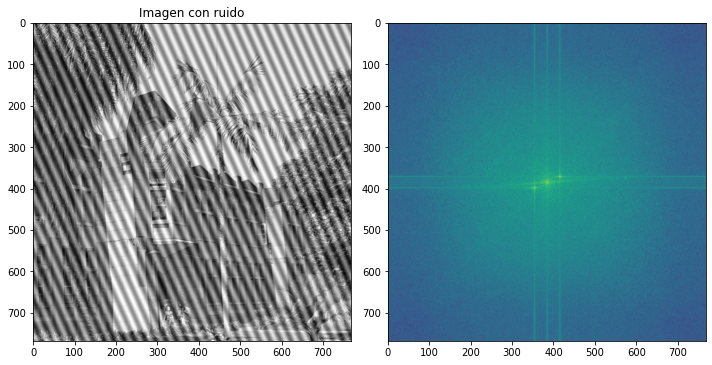

In [2]:
fig_1, img_1 = plt.subplots(1,2,figsize=(10, 10))

ruido=cv2.imread("b.png",cv2.IMREAD_UNCHANGED)

img_1[0].set_title("Imagen con ruido")
img_1[0].imshow(ruido,cmap="gray")

tf=(np.fft.fft2(ruido))
tf1=np.fft.fftshift(tf)
intensidad=np.abs(tf1)

img_1[1].imshow(np.log(intensidad))

fig_1.tight_layout()
plt.show()


In [3]:
mask_2=np.ones((768,768),dtype="uint8")


In [4]:
# Lineas verticales
cv2.line(mask_2,(353,0),(353,768),0,2);
cv2.line(mask_2,(415,0),(415,768),0,2);

#Lineas horizontales
cv2.line(mask_2,(0,398),(768,398),0,2);
cv2.line(mask_2,(0,370),(768,370),0,2);

cv2.circle(mask_2,(415,370),10,0,-1);
cv2.circle(mask_2,(353,398),10,0,-1);


#verticales centrales
cv2.line(mask_2,(384,0),(384,150),0,2);
cv2.line(mask_2,(384,620),(384,768),0,2);

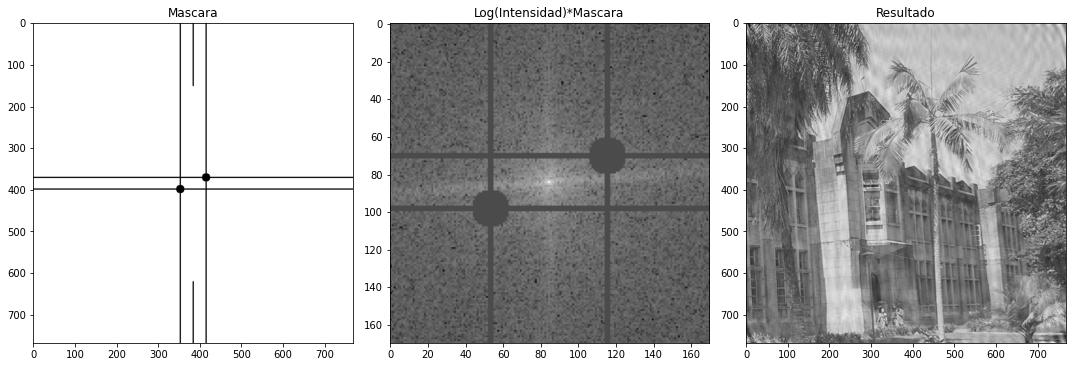

In [5]:
fig_2, img_2 = plt.subplots(1,3,figsize=(15, 15))

#Mascara
img_2[0].set_title("Mascara")
img_2[0].imshow(mask_2,cmap="gray")

#Se multiplica la mascara por la tranformada de fourier de la imagen original 
prueba= mask_2*tf1

img_2[1].set_title("Log(Intensidad)*Mascara")
img_2[1].imshow(np.log(np.abs(prueba+10000))[300:470, 300:470],cmap="gray")

#Se Grafica el resultado de la mascara por la tranformada de fourier de la imagen original 
img_2[2].set_title("Resultado")
img_2[2].imshow((np.abs((np.fft.ifft2(prueba)))),cmap="gray")

fig_2.tight_layout()
plt.show()